# 순환 신경망: Recurrent Neural Network, RNN
- 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델입니다.
- 뒤에서 배우는 LSTM이나 GRU 또한 근본적으로 RNN에 속합니다.

## 1. 순환 신경망: Recurrent Nueral Network, RNN
- 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고 있습니다.

    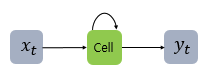
- RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다.
- 은닉층의 메모리 셀은 각각의 시점에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있습니다.

    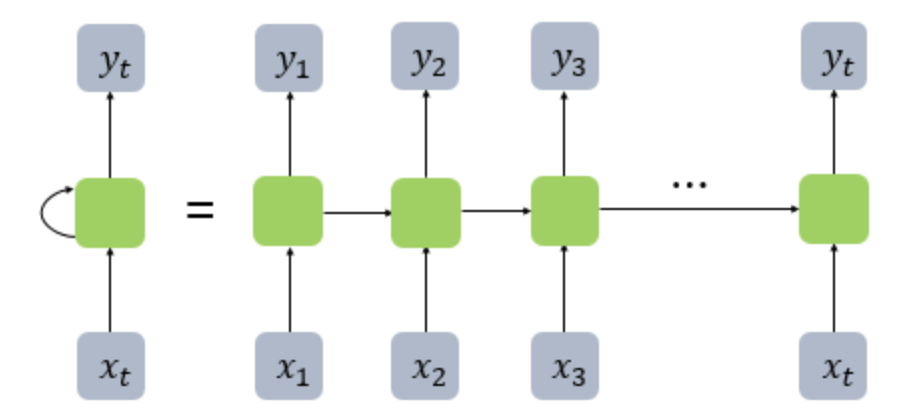
    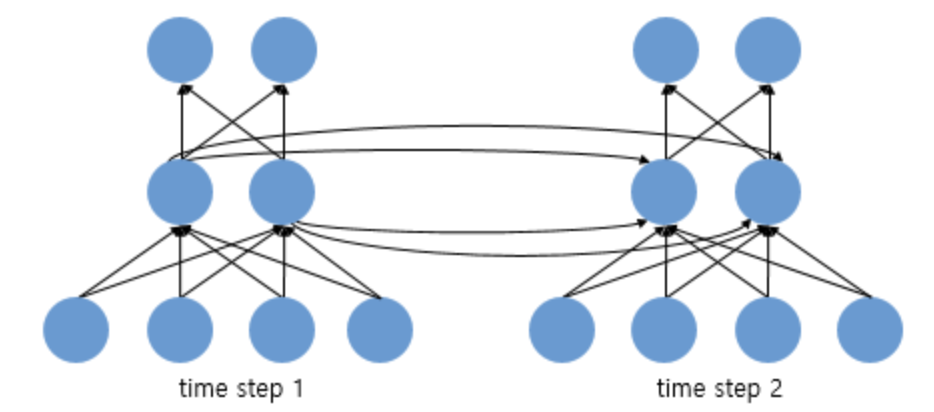
    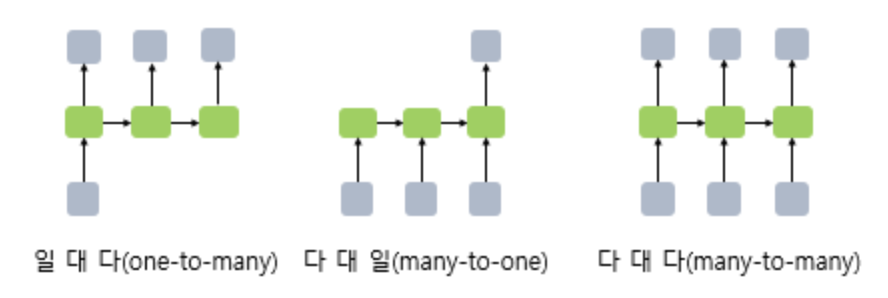
- 일대다(one-tomany)구조의 모델은 하나의 이미지 입력에 대해서 사진의 제목을 출력하는 이미지 캡셔닝(image captioning) 작업에 사용할 수 있습니다.
- 다대일(many-to-one)구조의 모델은 감성 분류(sentiment classification), 또는 스펨 메일 분류(spam detection) 등에 사용할 수 있습니다.

    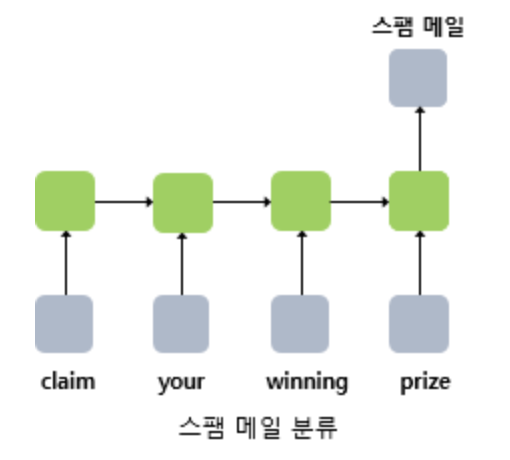
- 다대다(many-to-many) 구조의 모델의 경우에는 챗봇, 번역기 또는 개체명 인식이나 품사 태깅과 같은 작업에 사용할 수 있습니다.

    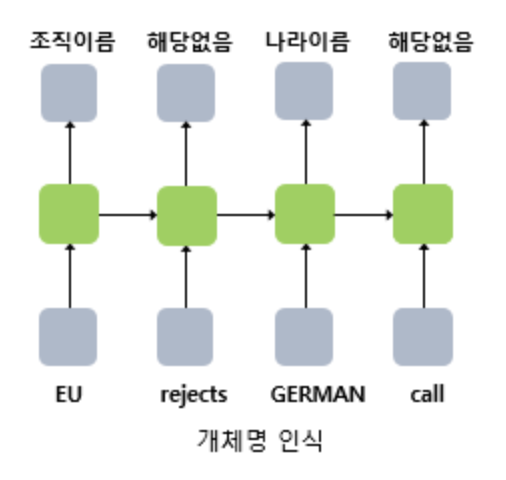
- RNN 수식 정의하기:

    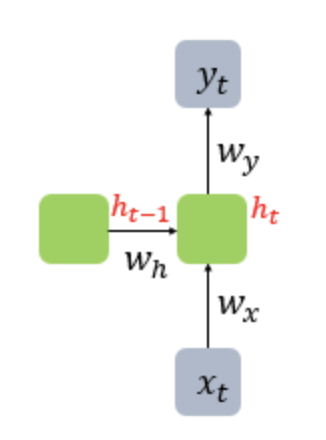
    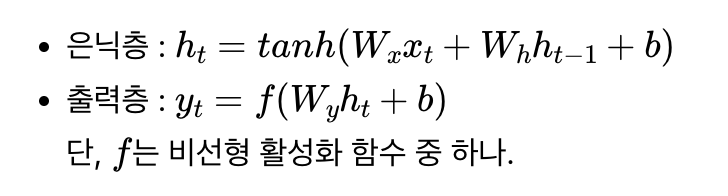
- 벡터와 행렬 연산으로 이해하기: 배치 크기가 1이고, d와 D_h 두 값 모두 4라고 가정

    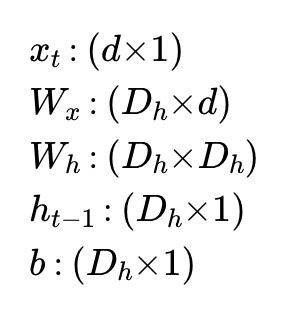
    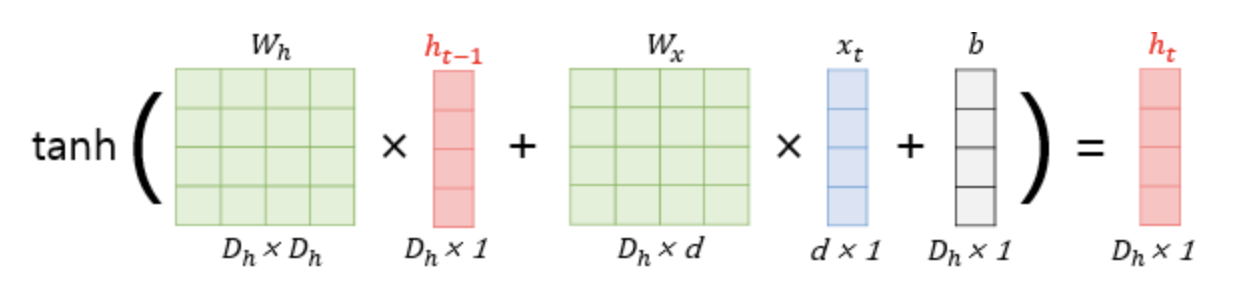

## 2. 케라스로 RNN 구현하기
- hidden_units = 은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다
- timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수
- input_dim = 입력의 크기

    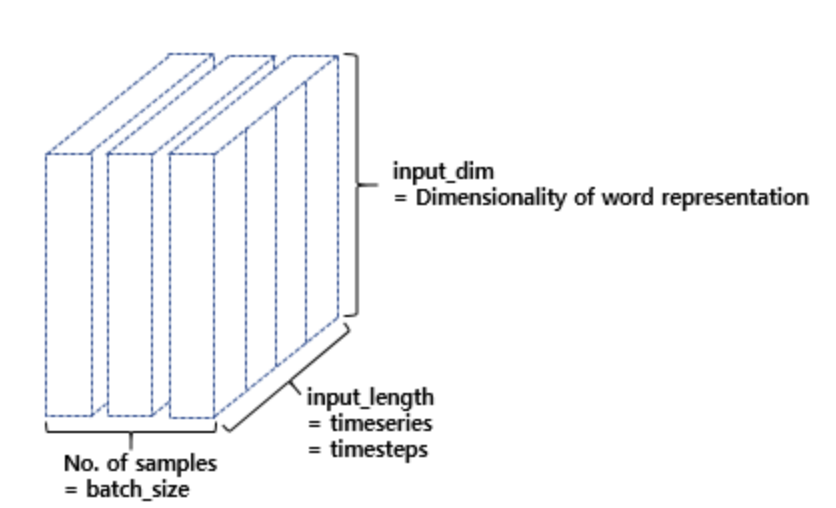
- RNN 층의 return_sequences 매개 변수에 True를 설정:

    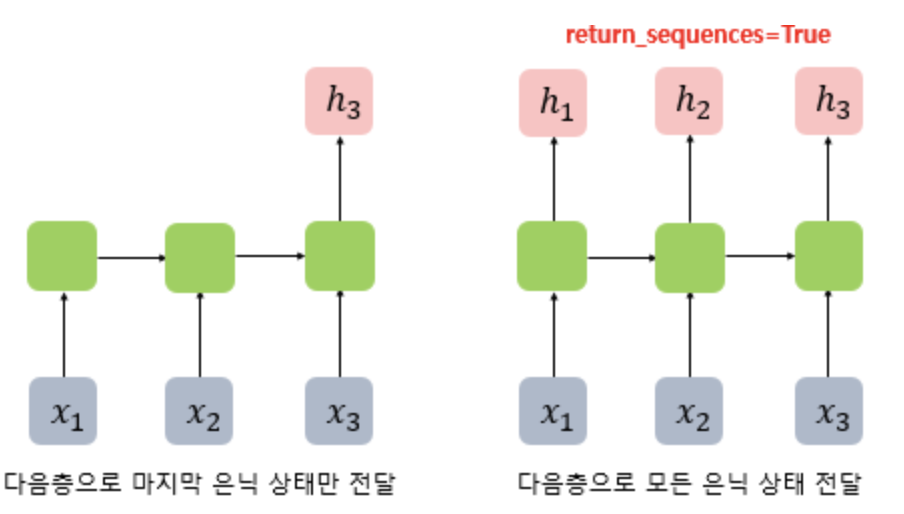
- 마지막 은닉 상태만 전달하도록 하면 다대일 문제를 풀 수 있고, 그렇지 않으면 다대다 문제를 풀 수 있습니다.

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

In [ ]:
# 추가 인자를 사용할 때
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))

# 다른 표기
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. 파이썬으로 RNN 구현하기

In [ ]:
# 아래의 코드는 가상의 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.

In [5]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [7]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.91559771 0.94893399 0.96914646 0.88900466 0.97928588 0.92392178
  0.97770878 0.97324483]
 [0.99988937 0.99974665 0.99999062 0.99996925 0.99999666 0.99997393
  0.99999547 0.99997706]
 [0.99993121 0.99971199 0.99998807 0.99995158 0.9999938  0.99997821
  0.99999188 0.99998084]
 [0.99994707 0.99986593 0.99999618 0.99998852 0.99999865 0.99998929
  0.9999994  0.99999345]
 [0.99994424 0.99986515 0.99999728 0.99998969 0.99999875 0.99999239
  0.9999988  0.99999307]
 [0.9999732  0.99996168 0.99999874 0.99999207 0.99999935 0.99999694
  0.99999943 0.99999752]
 [0.99992297 0.99986414 0.99999739 0.99999    0.99999922 0.99998939
  0.99999694 0.99998615]
 [0.9998623  0.99941615 0.99998874 0.99997239 0.99999622 0.9999646
  0.9999914  0.99996   ]
 [0.99993291 0.99985173 0.99999631 0.99998452 0.9999986  0.99998878
  0.99999631 0.99998712]
 [0.99992385 0.99975389 0.99999387 0.99998266 0.99999777 0.99998282
  0.99999818 0.99998666]]


## 4. 깊은 순환 신경망: Deep Recurrent Neural Network

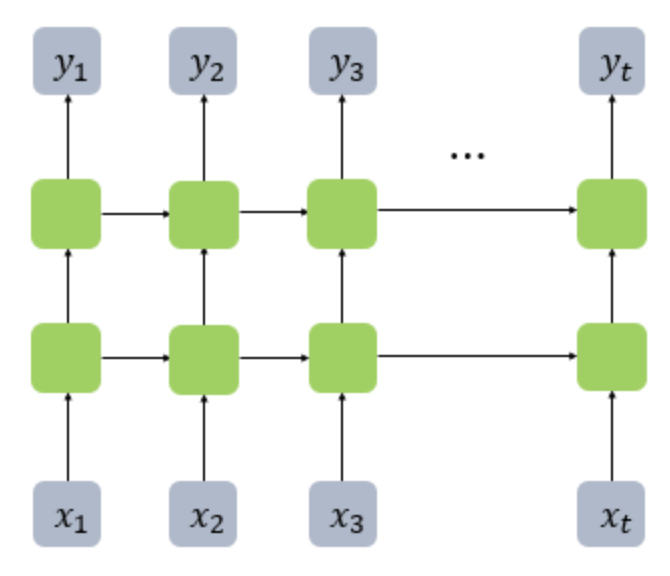
- 의사 코드:

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))

## 3. 양방향 순환 신경망: Bidirectional Recurrent Neural Network

- RNN이 풀고자 하는 문제 중에서는 과거 시점의 입력 뿐만 아니라 미래 시점의 입력에 힌트가 있는 경우도 많습니다.

    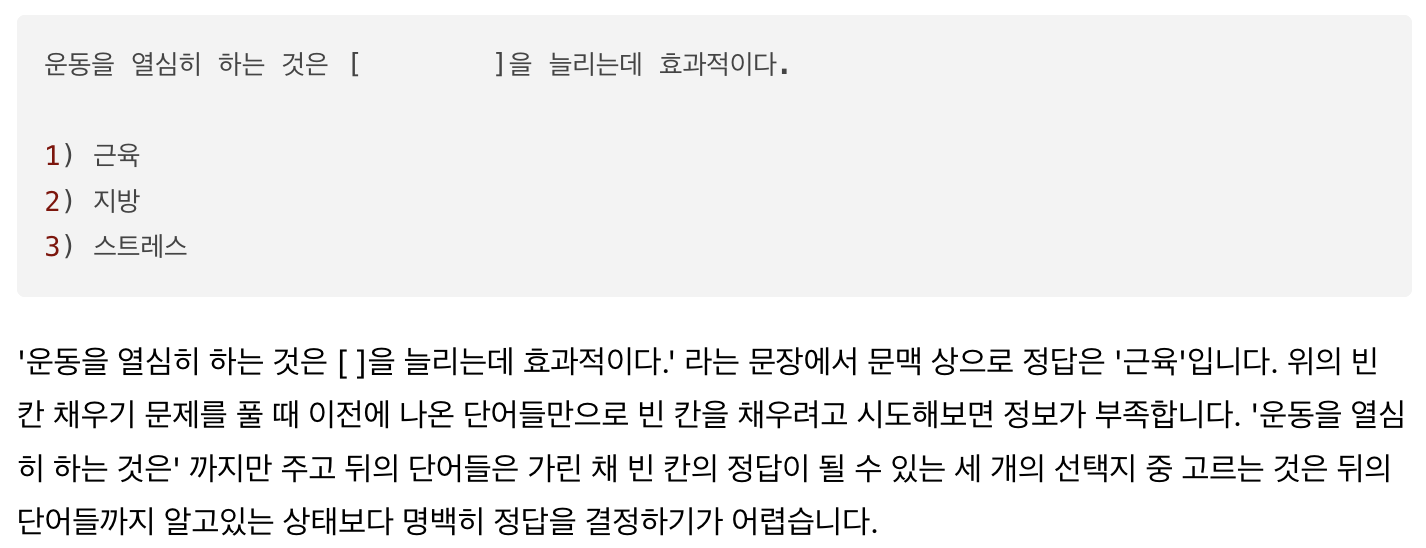
- 양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다.

    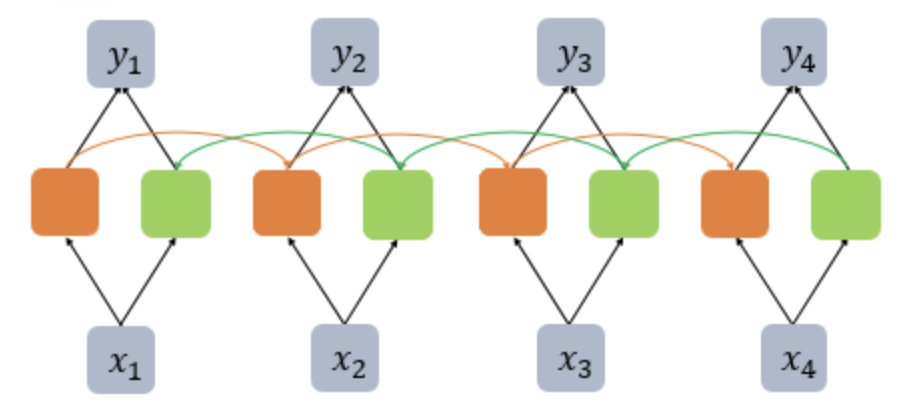
- 위 그림에서 주황색 메모리 셀은 **앞 시점의 은닉 상태(Foward States)**를 전달받아 현재의 은닉 상태를 계산합니다.
- 그리고 초록색 메모리 셀은 **뒤 시점의 은닉 상태(Backward States)**를 전달받아 현재의 은닉 상태를 계산합니다.
- 양방향 RNN도 다수의 은닉층을 가질 수 있고, 다른 인공 신경망 모델들도 마찬가지이지만, 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아닙니다.
- 은닉층을 추가하면 학습할 수 있는 양은 많아지지만 반대로 훈련 데이터 또한 많은 양이 필요합니다.

In [ ]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

In [ ]:
# 은닉층이 4개인 경우
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))

## 6. 점검 퀴즈
- 모델의 설명이 다음과 같을 때, 총 파라미터 개수를 구해보세요.
    1. Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다.
    2. 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
    3. 훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
    4. 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
    5. 은닉층은 1개입니다.

- 풀이 과정:
    Embedding = 5,000(input) * 100(embedding) = 500,000
    Wh = 128(embedding) * 128(hidden) = 16,384
    Wx = 100(embedding) * 128(hidden) = 12,800
    Wy = 128 * 1 = 128
    bias(hidden) = 128

    total = 529,441